In [586]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [587]:
os.chdir(r"C:\Users\anima\Documents\Kaggle\dota2")
filename =  "det_img.jpg"

In [588]:
img= cv2.imread(filename)
print(img.shape, img.size, img.dtype)

((1080L, 1920L, 3L), 6220800, dtype('uint8'))


In [589]:
# Crop the top 20%
# Note opencv represents as Y,X or height, width
height, width = img.shape[:2]
cropped = img[:int(0.2*height), :]
cv2.imshow('image1',cropped)
cv2.waitKey(0)

-1

In [590]:
base_img1 = cropped.copy()
base_img2 = cropped.copy()
print(base_img1.shape, base_img1.size, base_img1.dtype)

((216L, 1920L, 3L), 1244160, dtype('uint8'))


# Lets try to find size of our image
crop2 = base_img[90:160, 160:260]
cv2.imshow('image2',crop2)
cv2.waitKey(0)
print(crop2.shape)

In [591]:
#file2 = "antimage_lg.png"
#file2 = "batrider_lg.png"
#file2 = "skeleton_king_lg.png"
#file2 = "ancient_apparition_lg.png"
#file2 = "crystal_maiden_lg.png"
#file2 = "dazzle_lg.png"
file2 = "invoker_lg.png"
img2= cv2.imread(file2)
template = cv2.resize(img2, (90,50))
print(template.shape, template.size, template.dtype)
cv2.imshow('image2', template)
cv2.waitKey(0)

((50L, 90L, 3L), 13500, dtype('uint8'))


-1

(189, 126)


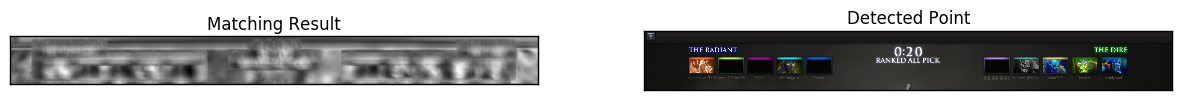

In [592]:
# Lets try and match this
h, w = template.shape[:2]
gray = cv2.cvtColor(base_img1,cv2.COLOR_BGR2GRAY)
res = cv2.matchTemplate(base_img1, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where(res >= threshold) and np.where(res == res.max())
#loc = np.where(res == res.max())
for pt in zip(*loc[::-1]):
    cv2.rectangle(base_img2, pt, (pt[0] + w, pt[1] + h), (0,255,0), 1)
print(pt)    
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(res, cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(base_img2, cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

In [593]:
cv2.imshow('img',base_img2) 
cv2.waitKey(0)

-1

In [594]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [595]:
det_area = base_img2[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
print(det_area.shape, template.shape)
cv2.imshow('img',det_area) 
cv2.waitKey(0)


((50L, 90L, 3L), (50L, 90L, 3L))


-1

In [596]:
cv2.imshow('img',template) 
cv2.waitKey(0)

-1

In [597]:
err = mse(template, det_area)
print(err)

15308.914
